**Importing Required Libraries**

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

sns.set_context('talk')
sns.set_style('darkgrid')

**Defining Function for Lorenz Differential Equations**

In [2]:
def lorenz_func(input, output, func_params):
    sigma, r, b = func_params
    x_slope = -sigma*(output[0] - output[1])
    y_slope = r*output[0] - output[1] - output[0]*output[2]
    z_slope = output[0]*output[1] - b*output[2]
    return np.array([x_slope, y_slope, z_slope])

**$\mathbf{4^{th}}$ Order Runge-Kutta Algorithm**

In [3]:
def rk4_step(func, in_old, out_old, step, func_params):
    step2 = step/2.0
    step6 = step/6.0

    k1 = func(in_old, out_old, func_params)
    k2 = func(in_old + step2, out_old + step2*k1, func_params)
    k3 = func(in_old + step2, out_old + step2*k2, func_params)
    k4 = func(in_old + step, out_old + step*k3, func_params)

    return out_old + step6*(k1 + 2.0*k2 + 2.0*k3 + k4)

**Function to Integrate Lorenz Equations**

In [4]:
def get_txyz_lorenz(lorenz_params=[3.0, 17.0, 1.0],
                   init_conditions=[0.0, 1.0, 0.0],
                   step_size=1e-1, start_time=0.0, end_time=50.0):
    #lorenz_params = [sigma, r, b]

    t_array = np.arange(start_time, end_time + step_size, step_size)
    out_array = np.empty((3, len(t_array)))
    out_array[:,0] = init_conditions

    for i in range(1, len(t_array)):
        out_array[:, i] = rk4_step(lorenz_func, t_array[i-1], out_array[:, i-1], step_size, lorenz_params)

    x_array = out_array[0, :]
    y_array = out_array[1, :]
    z_array = out_array[2, :]

    return t_array, x_array, y_array, z_array

def test_convergence(x, y, z, converge_point=[-4, -4, 16], check_number=-100, sigma=1.0):
    median_point = [np.median(x[check_number:]), np.median(y[check_number:]), np.median(z[check_number:])]
    sigma_vals = [np.std(x[check_number:]), np.std(y[check_number:]), np.std(z[check_number:])]
    status = True
    for i in range(0, 3):
        if np.abs(median_point[i] - converge_point[i]) <= sigma_vals[i]:
            pass
        else:
            status = False
    return status

**Plotting Routines**

In [66]:
def plot_xyz(t, x, y, z, save_name='SHOW', x_label=r'$r=154.5$'):
    fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True)

    ax1.plot(t, x, label=x_label)
    ax1.set_ylabel(r'$x$')
    
    ax2.plot(t, y)
    ax2.set_ylabel(r'$y$')

    ax3.plot(t, z)
    ax3.set_xlabel(r'$t$')
    ax3.set_ylabel(r'$z$')

    plt.suptitle('Co-ordinate Diagrams')

    if save_name == 'SHOW':
        plt.show()
    elif save_name == 'RETURN':
        return fig, [ax1, ax2, ax3]
    else:
        plt.savefig(save_name)


def plot_phase_space(t, x, y, z, save_name='SHOW'):
    fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True)

    ax1.plot(x, y)
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    ax1.set_title(r'$y$ vs $x$')

    ax2.plot(z, y)
    ax2.set_xlabel(r'$z$')
    ax2.set_title(r'$y$ vs $z$')

    plt.suptitle('Phase-Space Diagrams', y=1.02)

    if save_name == 'SHOW':
        plt.show()
    elif save_name == 'RETURN':
        return fig, [ax1, ax2]
    else:
        plt.savefig(save_name)


def plot_power_period(t, periodic_array, periodic_label=r'$x$',
                      upper_limit=None, save_name='SHOW', line_params=['-', r'$r=154.5$']):
    fig, [ax1, ax2] = plt.subplots(2, 1)

    freqs = np.fft.fftfreq(len(t), t[1]-t[0])
    power = (np.abs(np.fft.fft(periodic_array)))**2.0
    power_sort = power[np.argsort(freqs)]
    freq_sort = np.sort(freqs)
    if upper_limit:
        freq_mask = np.where(((freq_sort > 0.0) & (freq_sort < upper_limit)))
    else:
        freq_mask = np.where(freq_sort > 0.0)
    if save_name == 'RETURN':
        ax1.semilogy(freq_sort[freq_mask], power_sort[freq_mask], line_params[0], label=line_params[1])
    else:
        ax1.semilogy(freq_sort[freq_mask], power_sort[freq_mask])
    ax1.set_xlabel('Frequency')
    ax1.set_ylabel('Power')

    ax2.plot(t, periodic_array)
    ax2.set_xlabel(r'$t$')
    ax2.set_ylabel(periodic_label)

    plt.suptitle('Periodicity Analysis')

    if save_name == 'SHOW':
        plt.show()
    elif save_name == 'RETURN':
        return fig, [ax1, ax2]
    else:
        plt.savefig(save_name)

def plot_poincare_x(t, x, y, z, save_name='SHOW', line_params=[r'$r=154.$']):
    fig = plt.figure()
    zero_crossings = np.where(np.diff(np.signbit(x)))[0]
    if save_name == 'RETURN':
        plt.scatter(z[zero_crossings], y[zero_crossings], label=line_params[0])
    else:
        plt.scatter(z[zero_crossings], y[zero_crossings])
    plt.xlabel(r'$z$')
    plt.ylabel(r'$y$')
    plt.title(r'$\mathrm{Poincar\'e}$ $\mathrm{Map}$ $\mathrm{for}$ $x=0$')

    if save_name == 'SHOW':
        plt.show()
    elif save_name == 'RETURN':
        return fig
    else:
        plt.savefig(save_name)

***Problem 1:*** **a)** Using $r=1$, $\sigma=3$, $b=1$ for the Lorenz equations at initial conditions $x=z=0$, $y=1$ plot $x(t), y(t), z(t)$ to show that they converge to $[-4, -4, 16]$. Also show the phase-space diagrams for $y(t)$ vs $x(t)$ and $y(t)$ vs $z(t)$. 

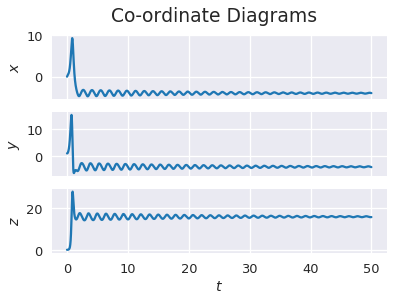

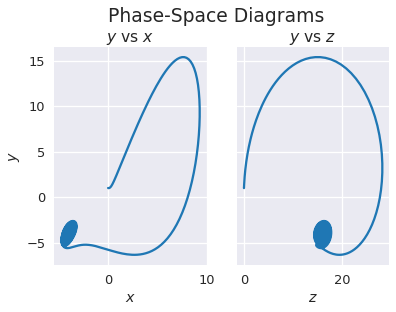

In [67]:
t,x, y, z = get_txyz_lorenz(step_size=1e-2)
plot_xyz(t, x, y, z)
plot_phase_space(t, x, y, z)

***Problem 1:*** **b)** Using different initial conditions, but the same Lorenz parameters, find which  solutions converge to the same stable point as **a)**.

**Finding the Volume of XYZ initial conditions that Converge**

In [7]:
x_vals = np.linspace(-10.0, 10.0, 25)
y_vals = np.copy(x_vals)
z_vals = np.copy(x_vals)
counter = 0
all_coords = list(itertools.product(x_vals, y_vals, z_vals))
status_array = [False]*len(all_coords)
for init_conditions in all_coords:
    t, x, y, z = get_txyz_lorenz(init_conditions=init_conditions)
    status_array[counter] = test_convergence(x, y, z)
    counter += 1

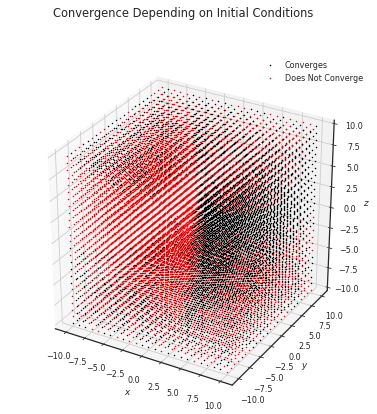

In [73]:
pts = np.array(all_coords)[np.where(status_array)]
pts2 = np.array(all_coords)[np.where(np.invert(status_array))]
sns.set_style('white')
sns.set_context('paper')
fig = plt.figure(figsize=(6.5, 6.5))
ax = fig.add_subplot(111, projection="3d")
plt.plot(pts[:,0], pts[:,1], pts[:,2], '.k', markersize=3, label='Converges')
plt.plot(pts2[:,0], pts2[:,1], pts2[:,2], '.r', markersize=3, label='Does Not Converge')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
ax.set_zlabel(r'$z$')
plt.legend(loc='upper right')
plt.suptitle('Convergence Depending on Initial Conditions')
plt.show()

This is not quite as simple as a strict volume where things converge,
but there does seem to be an alternating structure of some sort.

***Problem 2: Repeat the above for $r=26$ to observe the random behavior in the neighborhood of the critical points a) $x=y=5$, $z=25$ and b) $x=y=-5$, $z=25$***

**Critical Point $x=y=5$, $z=25$**

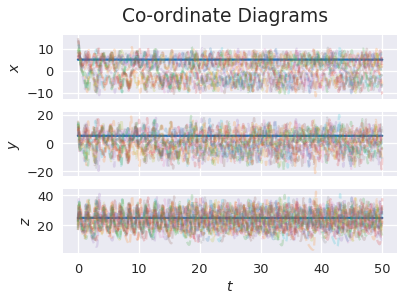

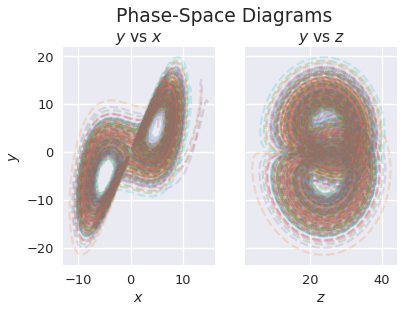

In [78]:
sns.set_context('talk')
sns.set_style('darkgrid')
t,x, y, z = get_txyz_lorenz(lorenz_params=[3.0, 26.0, 1.0],
                            init_conditions=[5.0, 5.0, 25.0], step_size=1e-2)
xyz_fig, [x_ax, y_ax, z_ax] = plot_xyz(t, x, y, z, save_name='RETURN')
phase_fig, [yx_ax, yz_ax] = plot_phase_space(t, x, y, z, save_name='RETURN')


for i in range(0, 15):
    eps_random = np.random.uniform([5.0, 5.0, 25.0], [15.0, 15.0, 15.0])
    t_eps, x_eps, y_eps, z_eps = get_txyz_lorenz(lorenz_params=[3.0, 26.0, 1.0],
                                                 init_conditions=eps_random, step_size=1e-2)
    x_ax.plot(t_eps, x_eps, '--', alpha=0.2)
    y_ax.plot(t_eps, y_eps, '--', alpha=0.2)
    z_ax.plot(t_eps, z_eps, '--', alpha=0.2)
    yx_ax.plot(x_eps, y_eps, '--', alpha=0.2)
    yz_ax.plot(z_eps, y_eps, '--', alpha=0.2)

**Critical Point $x=y=-5$, $z=25$**

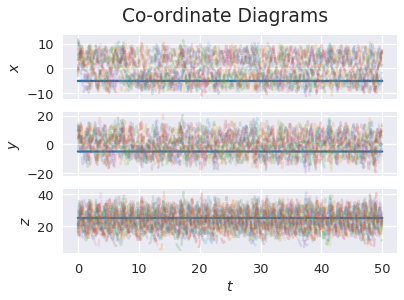

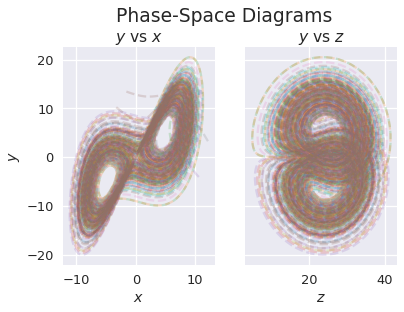

In [75]:
t,x, y, z = get_txyz_lorenz(lorenz_params=[3.0, 26.0, 1.0],
                            init_conditions=[-5.0, -5.0, 25.0], step_size=1e-2)
xyz_fig, [x_ax, y_ax, z_ax] = plot_xyz(t, x, y, z, save_name='RETURN')
phase_fig, [yx_ax, yz_ax] = plot_phase_space(t, x, y, z, save_name='RETURN')

for i in range(0, 15):
    eps_random = np.random.uniform([-5.0, -5.0, 25.0], [15.0, 15.0, 15.0])
    t_eps, x_eps, y_eps, z_eps = get_txyz_lorenz(lorenz_params=[3.0, 26.0, 1.0],
                                                 init_conditions=eps_random, step_size=1e-2)
    x_ax.plot(t_eps, x_eps, '--', alpha=0.2)
    y_ax.plot(t_eps, y_eps, '--', alpha=0.2)
    z_ax.plot(t_eps, z_eps, '--', alpha=0.2)
    yx_ax.plot(x_eps, y_eps, '--', alpha=0.2)
    yz_ax.plot(z_eps, y_eps, '--', alpha=0.2)

In both sets of plots above, the solid blue line represents results where the initial condition was equal to the critical point. For each critical point, I did 15 integrations where the initial conditions were drawn from the distribution $\mathcal{N}\left(\mu = \left[\pm5, \pm5, 25\right], \sigma=\left[15, 15, 15\right]\right)$. Keep in mind that all cases use the same values of $\sigma=3$, $r=26$, and $b=1$. The results of these deviated integrations are overlaid on the original plot in faded dashed lines. The critical point stays stationary while the deviations all follow a periodic structure.

Even for those cases where the initial positions were significantly far from the critical point, they converged to the same region in phase space fairly quickly. All these cases settled into orbits with two lobes, where one lobe was much tighter than the other, though which lobe was better constrained seems to depend on whether they fell above or below the line connecting the center of each lobe. Looking at the $y \mathrm{ vs } x$ phase-space plot directly above, for $x=y=-5$ and $z=25$, we see that those cases which started from above and to the left of the line, the lower left lobe was the larger one. If they started below and to the right of the line, the upper left lobe was better constrained instead. Aside from the lobe variation, the greater the original deviation, the larger the orbit amplitude overall.

***Problem 3: Examine one of the period doubling windows discussed in the extract by Sparrow. Be sure to include an integration that lies in the range of noisy periodicity. Amongst the plots you use to illustrate your results include the Poincare diagrams.***

In [61]:
window_low = 148.2
window_high = 166.07
window_mid = 160.0
r_noisy = window_low - 1.5

t_low,x_low, y_low, z_low = get_txyz_lorenz(lorenz_params=[10.0, window_low, 8.0/3.0],
                            init_conditions=[-15.0, -15.0, 20.0], step_size=1e-3)
t_mid,x_mid, y_mid, z_mid = get_txyz_lorenz(lorenz_params=[10.0, window_mid, 8.0/3.0],
                            init_conditions=[-15.0, -15.0, 20.0], step_size=1e-3)
t_high,x_high, y_high, z_high = get_txyz_lorenz(lorenz_params=[10.0, window_high, 8.0/3.0],
                            init_conditions=[-15.0, -15.0, 20.0], step_size=1e-3)
t_noisy,x_noisy, y_noisy, z_noisy = get_txyz_lorenz(lorenz_params=[10.0, r_noisy, 8.0/3.0],
                            init_conditions=[-15.0, -15.0, 20.0], step_size=1e-3)

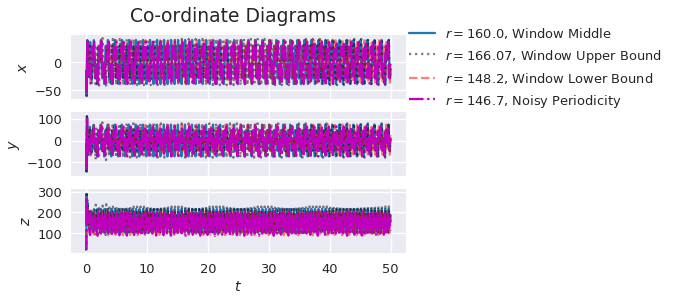

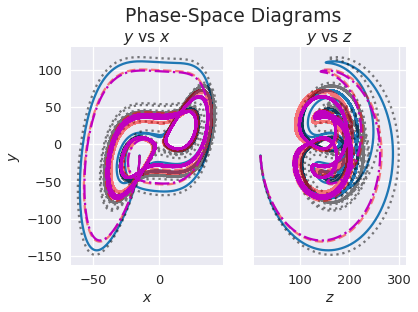

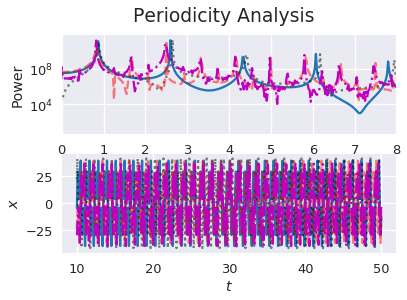

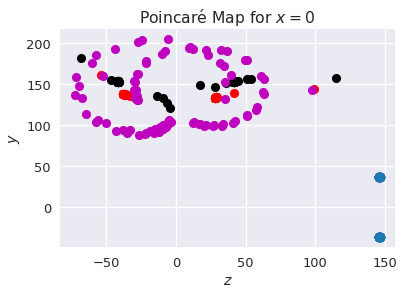

In [82]:
periodic_check = 10000
low_label = r'$r=' + (r'%s' % window_low) + r'$' + r', Window Lower Bound'
mid_label = r'$r=' + (r'%s' % window_mid) + r'$' + r', Window Middle'
high_label = r'$r=' + (r'%s' % window_high) + r'$' + r', Window Upper Bound'
noisy_label = r'$r=' + (r'%s' % r_noisy) + r'$' + r', Noisy Periodicity'

coords_fig, [x_ax, y_ax, z_ax] = plot_xyz(t_mid, x_mid, y_mid, z_mid, save_name='RETURN', x_label=mid_label)
phase_fig, [yx_ax, yz_ax] = plot_phase_space(t_mid, x_mid, y_mid, z_mid, save_name='RETURN')
period_fig, [power_ax, coord_ax] = plot_power_period(t_mid[periodic_check:],
                                                     x_mid[periodic_check:],
                                                     save_name='RETURN',
                                                    line_params=['-', mid_label])
poincare_fig = plot_poincare_x(t_mid[periodic_check:],
                               x_mid[periodic_check:],
                               y_mid[periodic_check:],
                               z_mid[periodic_check:], save_name='RETURN', line_params=[mid_label])

x_ax.plot(t_high, x_high, ':k', label=high_label, alpha=0.5)
x_ax.plot(t_low, x_low, '--r', label=low_label, alpha=0.5)
x_ax.plot(t_noisy, x_noisy, '-.m', label=noisy_label, alpha=1.0)
x_ax.legend(loc='center right', bbox_to_anchor=(1.8, 0.5))

y_ax.plot(t_high, y_high, ':k', alpha=0.5)
y_ax.plot(t_low, y_low, '--r', alpha=0.5)
y_ax.plot(t_noisy, y_noisy, '-.m', alpha=1.0)

z_ax.plot(t_high, z_high, ':k', alpha=0.5)
z_ax.plot(t_low, z_low, '--r', alpha=0.5)
z_ax.plot(t_noisy, z_noisy,'-.m', alpha=1.0)

yx_ax.plot(x_high, y_high, ':k', alpha=0.5)
yz_ax.plot(z_high, y_high, ':k', alpha=0.5)

yx_ax.plot(x_low, y_low, '--r', alpha=0.5)
yz_ax.plot(z_low, y_low, '--r', alpha=0.5)

yx_ax.plot(x_noisy, y_noisy, '-.m', alpha=1.0)
yz_ax.plot(z_noisy, y_noisy, '-.m', alpha=1.0)

freq_high_unsort = np.fft.fftfreq(len(t_high[periodic_check:]), t_high[1])
freq_low_unsort = np.fft.fftfreq(len(t_low[periodic_check:]), t_low[1])
freq_noisy_unsort = np.fft.fftfreq(len(t_noisy[periodic_check:]), t_noisy[1])

power_high_unsort = (np.abs(np.fft.fft(x_high[periodic_check:])))**2.0
power_low_unsort = (np.abs(np.fft.fft(x_low[periodic_check:])))**2.0
power_noisy_unsort = (np.abs(np.fft.fft(x_noisy[periodic_check:])))**2.0

power_high = power_high_unsort[np.argsort(freq_high_unsort)]
power_low = power_low_unsort[np.argsort(freq_low_unsort)]
power_noisy = power_noisy_unsort[np.argsort(freq_noisy_unsort)]

freq_high = np.sort(freq_high_unsort)
freq_low = np.sort(freq_low_unsort)
freq_noisy= np.sort(freq_noisy_unsort)

power_ax.plot(freq_high, power_high,':k', alpha=0.5)
power_ax.plot(freq_low, power_low, '--r', alpha=0.5)
power_ax.plot(freq_noisy, power_noisy, '-.m', alpha=1.0)

coord_ax.plot(t_high[periodic_check:], x_high[periodic_check:],':k', alpha=0.5)
coord_ax.plot(t_low[periodic_check:], x_low[periodic_check:], '--r', alpha=0.5)
coord_ax.plot(t_noisy[periodic_check:], x_noisy[periodic_check:], '-.m', alpha=1.0)

power_ax.set_xlim(0.0, 8.0)

zero_low = np.where(np.diff(np.signbit(x_low)))[0]
zero_high = np.where(np.diff(np.signbit(x_high)))[0]
zero_noisy = np.where(np.diff(np.signbit(x_noisy)))[0]

poincare_fig.gca().plot(y_high[zero_high], z_high[zero_high], '.k', marker='o')
poincare_fig.gca().plot(y_low[zero_low], z_low[zero_low], '.r', marker='o')
poincare_fig.gca().plot(y_noisy[zero_low], z_noisy[zero_low], '.m', marker='o')